# K-Nearest Neighbors - KNN

Modelo supervisionado de machine learning que pode ser utilizado tanto para classificação, isto é, rotular os dados; quanto para regressão, ou seja, aproximar valores.

## Características

- Dependendo da implementação pode ser $O(n*m)$ ou $O(log(n))$
- Simples
- Interpretável
- Largamente conhecido e estudado
- Razoavelmente rápido

Por conta disso é um ótimo benchmark


## Algoritmo

- Passo 1: 
    Definir um valor para K
- Passo 2: 
    Definir os K vizinhos mais próximos do ponto a ser classificado de acordo com uma função de distância.
- Passo 3:
    - Se for um problema de **Regressão**:
        Calcular a **média** de todos os vizinhos.
    - Se for um problema de **Classificação**:
        Calcular a **moda** de todos os vizinhos.
- Passo 4:
    Atribuir o valor/classe ao ponto de interesse conforme cálculo do Passo 3.

## Links Úteis
### Definições
- ["Primeira" aparição do modelo](https://apps.dtic.mil/dtic/tr/fulltext/u2/a800276.pdf)

### Casos de uso
- [Click Stream](https://www.sciencedirect.com/science/article/pii/S221083271400026X#:~:text=The%20K%2DNearest%20Neighbor%20classification,a%20given%20time%20%5B24%5D)
- [Battery life](https://www.sciencedirect.com/science/article/abs/pii/S0959652619342799)
- [Mahalanobis Distance](https://jmlr.csail.mit.edu/papers/volume10/weinberger09a/weinberger09a.pdf)
### Dataviz
- [IRA](https://lecture-demo.ira.uka.de/knn-demo/preset=3)
- [Playground](https://ml-playground.com/)
- [Playground](https://www.ccom.ucsd.edu/~cdeotte/programs/classify.html)

![Title](knn.jpeg)

## Definição do Problema

### Dados
Os dados abaixo são referentes ao cadastro de clientes de uma empresa de logística de entraga de alimentação. Nesse cadastro, há quanto foi gasto pelo cliente nas últimas 4 compras e uma classificação de NPS: **Promotor**, **Neutro**, **Detrator**. O nosso intuito é, a partir das últimas compras de alguns clientes que já deu uma nota NPS, estimar esse calssificação para aqueles que ainda não estão classificado, afim de melhorar o atendimento desses novos clientes.

Os dados abaixo seguem o seguinte padrão:

[**CPF**: INT, **Classificação NPS**: STRING, **Valor das últimas compras feitas pelo cliente**: TUPLA


[NPS](https://assets-global.website-files.com/633ec8b202a7496fb9c9dda9/64020daae50d701ac16ebd7a_Net%20Promoter%20Score.jpeg)

### Regras
- Se você precisar de usar uma função, crie e use-a!
- Não é permitido usar nenhum módulo externo como numpy e math.
- Use apenas os objetos e fluxos visto até o momento no curso

In [2]:
data = [[66707599984, 'Promotor', (51.00, 35.00, 14.00, 20.0)],
 [55695397315, 'Promotor', (49.00, 30.00, 14.00, 20.0)],
 [63743886918, 'Promotor', (47.00, 32.00, 13.00, 20.0)],
 [55941368774, 'Promotor', (46.00, 31.00, 15.00, 20.0)],
 [75486280874, 'Promotor', (50.00, 36.00, 14.00, 20.0)],
 [53164949799, 'Promotor', (54.00, 39.00, 17.00, 40.0)],
 [39898704131, 'Promotor', (46.00, 34.00, 14.00, 30.0)],
 [53740901207, 'Promotor', (50.00, 34.00, 15.00, 20.0)],
 [51735950236, 'Promotor', (44.00, 29.00, 14.00, 20.0)],
 [47305108951, 'Promotor', (49.00, 31.00, 15.00, 10.0)],
 [63858864633, 'Promotor', (54.00, 37.00, 15.00, 20.0)],
 [53363167240, 'Promotor', (48.00, 34.00, 16.00, 20.0)],
 [72133754195, 'Promotor', (48.00, 30.00, 14.00, 10.0)],
 [52802483512, 'Promotor', (43.00, 30.00, 11.00, 10.0)],
 [57925287214, 'Promotor', (48.00, 34.00, 19.00, 20.0)],
 [74354632224, 'Promotor', (50.00, 30.00, 16.00, 20.0)],
 [64020216626, 'Promotor', (50.00, 34.00, 16.00, 40.0)],
 [78223722856, 'Promotor', (52.00, 35.00, 15.00, 20.0)],
 [58245228846, 'Promotor', (52.00, 34.00, 14.00, 20.0)],
 [74490686776, 'Promotor', (47.00, 32.00, 16.00, 20.0)],
 [48646824781, 'Promotor', (48.00, 31.00, 16.00, 20.0)],
 [77381458676, 'Promotor', (54.00, 34.00, 15.00, 40.0)],
 [41615431874, 'Promotor', (52.00, 41.00, 15.00, 10.0)],
 [52163844491, 'Promotor', (55.00, 42.00, 14.00, 20.0)],
 [70276304567, 'Promotor', (49.00, 31.00, 15.00, 20.0)],
 [69119828185, 'Promotor', (50.00, 32.00, 12.00, 20.0)],
 [65441690046, 'Promotor', (55.00, 35.00, 13.00, 20.0)],
 [56457227894, 'Promotor', (49.00, 36.00, 14.00, 10.0)],
 [46939428126, 'Promotor', (44.00, 30.00, 13.00, 20.0)],
 [60979942480, 'Promotor', (51.00, 34.00, 15.00, 20.0)],
 [41648583220, 'Promotor', (50.00, 35.00, 13.00, 30.0)],
 [50376331791, 'Promotor', (45.00, 23.00, 13.00, 30.0)],
 [67008801023, 'Promotor', (44.00, 32.00, 13.00, 20.0)],
 [72149193419, 'Promotor', (50.00, 35.00, 16.00, 60.0)],
 [62830733382, 'Promotor', (51.00, 38.00, 19.00, 40.0)],
 [56716675811, 'Promotor', (48.00, 30.00, 14.00, 30.0)],
 [61089667146, 'Promotor', (51.00, 38.00, 16.00, 20.0)],
 [47795509468, 'Promotor', (46.00, 32.00, 14.00, 20.0)],
 [60899885693, 'Promotor', (53.00, 37.00, 15.00, 20.0)],
 [53433670705, 'Promotor', (50.00, 33.00, 14.00, 20.0)],
 [54850120580, 'Neutro', (70.00, 32.00, 47.00, 14.00)],
 [71457789994, 'Neutro', (64.00, 32.00, 45.00, 15.00)],
 [67692777563, 'Neutro', (69.00, 31.00, 49.00, 15.00)],
 [43133573182, 'Neutro', (55.00, 23.00, 40.00, 13.00)],
 [55150612815, 'Neutro', (65.00, 28.00, 46.00, 15.00)],
 [48211725243, 'Neutro', (57.00, 28.00, 45.00, 13.00)],
 [76686463776, 'Neutro', (63.00, 33.00, 47.00, 16.00)],
 [71971000560, 'Neutro', (49.00, 24.00, 33.00, 10.00)],
 [40307235992, 'Neutro', (66.00, 29.00, 46.00, 13.00)],
 [44826533081, 'Neutro', (52.00, 27.00, 39.00, 14.00)],
 [45735414894, 'Neutro', (59.00, 32.00, 48.00, 18.00)],
 [57137146514, 'Neutro', (61.00, 28.00, 40.00, 13.00)],
 [53657058251, 'Neutro', (63.00, 25.00, 49.00, 15.00)],
 [52941460485, 'Neutro', (61.00, 28.00, 47.00, 12.00)],
 [44306600683, 'Neutro', (64.00, 29.00, 43.00, 13.00)],
 [43460747924, 'Neutro', (66.00, 30.00, 44.00, 14.00)],
 [75590376075, 'Neutro', (68.00, 28.00, 48.00, 14.00)],
 [68267282206, 'Neutro', (67.00, 30.00, 50.00, 17.00)],
 [77567920298, 'Neutro', (60.00, 29.00, 45.00, 15.00)],
 [67600419504, 'Neutro', (57.00, 26.00, 35.00, 10.00)],
 [44902189811, 'Neutro', (55.00, 24.00, 38.00, 11.00)],
 [62966866614, 'Neutro', (55.00, 24.00, 37.00, 10.00)],
 [56182108880, 'Neutro', (58.00, 27.00, 39.00, 12.00)],
 [78299785392, 'Neutro', (60.00, 27.00, 51.00, 16.00)],
 [45206071878, 'Neutro', (54.00, 30.00, 45.00, 15.00)],
 [57381925887, 'Neutro', (60.00, 34.00, 45.00, 16.00)],
 [65654934891, 'Neutro', (67.00, 31.00, 47.00, 15.00)],
 [56130640481, 'Neutro', (63.00, 23.00, 44.00, 13.00)],
 [59667611672, 'Neutro', (56.00, 30.00, 41.00, 13.00)],
 [40349334385, 'Neutro', (55.00, 25.00, 40.00, 13.00)],
 [68422640081, 'Neutro', (55.00, 26.00, 44.00, 12.00)],
 [55245923439, 'Neutro', (61.00, 30.00, 46.00, 14.00)],
 [51286696873, 'Neutro', (58.00, 26.00, 40.00, 12.00)],
 [41065279767, 'Neutro', (50.00, 23.00, 33.00, 10.00)],
 [42866454119, 'Neutro', (56.00, 27.00, 42.00, 13.00)],
 [61962944542, 'Neutro', (57.00, 30.00, 42.00, 12.00)],
 [48623501235, 'Neutro', (57.00, 29.00, 42.00, 13.00)],
 [49475220139, 'Neutro', (62.00, 29.00, 43.00, 13.00)],
 [52245218531, 'Neutro', (51.00, 25.00, 30.00, 11.00)],
 [50932926697, 'Neutro', (57.00, 28.00, 41.00, 13.00)],
 [47432932248, 'Detrator', (63.00, 33.00, 60.00, 25.00)],
 [39321991579, 'Detrator', (58.00, 27.00, 51.00, 19.00)],
 [46283759608, 'Detrator', (71.00, 30.00, 59.00, 21.00)],
 [56996272538, 'Detrator', (63.00, 29.00, 56.00, 18.00)],
 [77232189978, 'Detrator', (65.00, 30.00, 58.00, 22.00)],
 [77183282421, 'Detrator', (76.00, 30.00, 66.00, 21.00)],
 [42857147573, 'Detrator', (49.00, 25.00, 45.00, 17.00)],
 [39331584043, 'Detrator', (73.00, 29.00, 63.00, 18.00)],
 [48130345228, 'Detrator', (67.00, 25.00, 58.00, 18.00)],
 [71422443953, 'Detrator', (72.00, 36.00, 61.00, 25.00)],
 [72508507904, 'Detrator', (69.00, 32.00, 57.00, 23.00)],
 [41188727558, 'Detrator', (56.00, 28.00, 49.00, 20.00)],
 [61358776640, 'Detrator', (77.00, 28.00, 67.00, 20.00)],
 [66934042323, 'Detrator', (63.00, 27.00, 49.00, 18.00)],
 [40622495567, 'Detrator', (67.00, 33.00, 57.00, 21.00)],
 [57221661311, 'Detrator', (72.00, 32.00, 60.00, 18.00)],
 [45159362930, 'Detrator', (62.00, 28.00, 48.00, 18.00)],
 [45018975174, 'Detrator', (61.00, 30.00, 49.00, 18.00)],
 [70685429140, 'Detrator', (64.00, 28.00, 56.00, 21.00)],
 [61808723477, 'Detrator', (72.00, 30.00, 58.00, 16.00)],
 [56363906548, 'Detrator', (74.00, 28.00, 61.00, 19.00)],
 [39646194720, 'Detrator', (79.00, 38.00, 64.00, 20.00)],
 [55385494438, 'Detrator', (64.00, 28.00, 56.00, 22.00)],
 [75796138061, 'Detrator', (63.00, 28.00, 51.00, 15.00)],
 [53595767857, 'Detrator', (61.00, 26.00, 56.00, 14.00)],
 [48758828080, 'Detrator', (77.00, 30.00, 61.00, 23.00)],
 [58387651356, 'Detrator', (63.00, 34.00, 56.00, 24.00)],
 [72846931192, 'Detrator', (64.00, 31.00, 55.00, 18.00)],
 [47046896346, 'Detrator', (60.00, 30.00, 48.00, 18.00)],
 [69730292799, 'Detrator', (69.00, 31.00, 54.00, 21.00)],
 [48177836349, 'Detrator', (67.00, 31.00, 56.00, 24.00)],
 [57976326635, 'Detrator', (69.00, 31.00, 51.00, 23.00)],
 [55710813002, 'Detrator', (58.00, 27.00, 51.00, 19.00)],
 [64028580439, 'Detrator', (68.00, 32.00, 59.00, 23.00)],
 [49962942971, 'Detrator', (67.00, 33.00, 57.00, 25.00)],
 [47250893163, 'Detrator', (67.00, 30.00, 52.00, 23.00)],
 [75559276274, 'Detrator', (63.00, 25.00, 50.00, 19.00)],
 [58529878272, 'Detrator', (65.00, 30.00, 52.00, 20.00)],
 [76005896622, 'Detrator', (62.00, 34.00, 54.00, 23.00)],
 [49212614633, 'Detrator', (59.00, 30.00, 51.00, 18.00)]]

no_class = [[45926320819, '', (58.00, 40.00, 12.00, 20.0)],
 [52559670741, '', (57.00, 44.00, 15.00, 40.0)],
 [59016004832, '', (54.00, 39.00, 13.00, 40.0)],
 [66175672425, '', (51.00, 35.00, 14.00, 30.0)],
 [53330429526, '', (57.00, 38.00, 17.00, 30.0)],
 [43765563403, '', (51.00, 38.00, 15.00, 30.0)],
 [68020822591, '', (54.00, 34.00, 17.00, 20.0)],
 [53939481689, '', (51.00, 37.00, 15.00, 40.0)],
 [47014057561, '', (46.00, 36.00, 10.00, 20.0)],
 [57183542047, '', (51.00, 33.00, 17.00, 50.0)],
            
 [68518284363, '', (50.00, 20.00, 35.00, 10.00)],
 [65806049885, '', (59.00, 30.00, 42.00, 15.00)],
 [54128073086, '', (60.00, 22.00, 40.00, 10.00)],
 [41306785494, '', (61.00, 29.00, 47.00, 14.00)],
 [65234831039, '', (56.00, 29.00, 36.00, 13.00)],
 [50964498067, '', (67.00, 31.00, 44.00, 14.00)],
 [50810951429, '', (56.00, 30.00, 45.00, 15.00)],
 [48765044397, '', (58.00, 27.00, 41.00, 10.00)],
 [41960083761, '', (62.00, 22.00, 45.00, 15.00)],
 [76657763082, '', (56.00, 25.00, 39.00, 11.00)],
            
 [64726487742, '', (65.00, 32.00, 51.00, 20.00)],
 [75746566283, '', (64.00, 27.00, 53.00, 19.00)],
 [78576734793, '', (68.00, 30.00, 55.00, 21.00)],
 [56440141847, '', (57.00, 25.00, 50.00, 20.00)],
 [66827423000, '', (58.00, 28.00, 51.00, 24.00)],
 [45267873396, '', (64.00, 32.00, 53.00, 23.00)],
 [46387191493, '', (65.00, 30.00, 55.00, 18.00)],
 [54273611732, '', (77.00, 38.00, 67.00, 22.00)],
 [75135392881, '', (77.00, 26.00, 69.00, 23.00)],
 [64703873108, '', (60.00, 22.00, 50.00, 15.00)]]

### Entrega

- Grupos de 4 a 5 alunos
- Entrega até dia 27/10
- Entrega de um notebook com a classficação de NPS desses novos clientes
- Enviar arquivo .ipynb ou link do github através do **LMS**

# Durante as aulas

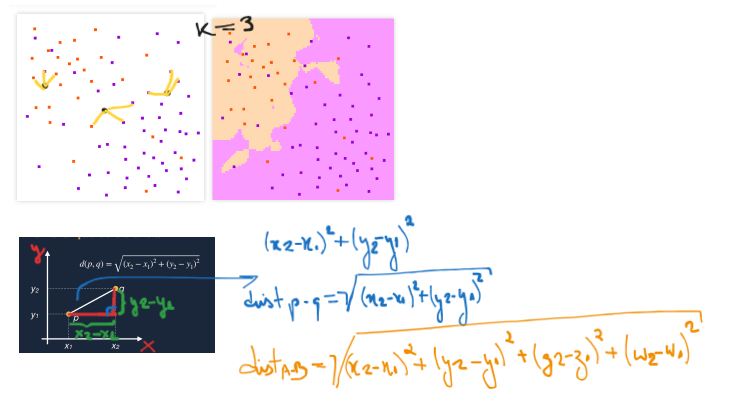

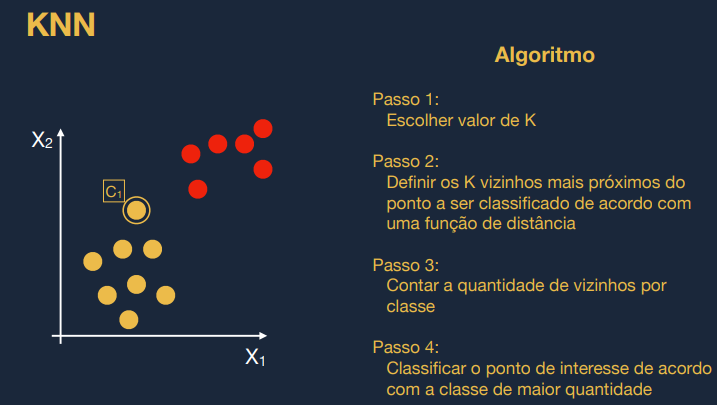

E se k=4? O que fazer quando empata?

- Pode usar k=5 (fixo) ou fazer um algoritmo que peça para o usuário colocar o valor de k

Exemplo de uso de biblioteca MAS vcs não podem usar
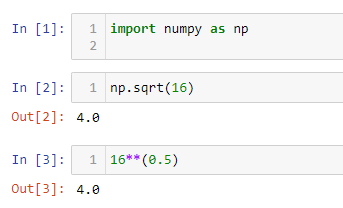